<a href="https://colab.research.google.com/github/igor-stefan/disciplina_controle1_EE2021/blob/main/Projeto4_Controle1_2021_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control
import control as co
import numpy as np
import matplotlib.pyplot as plt

Limite do Ganho K para estabilidade =  inf 



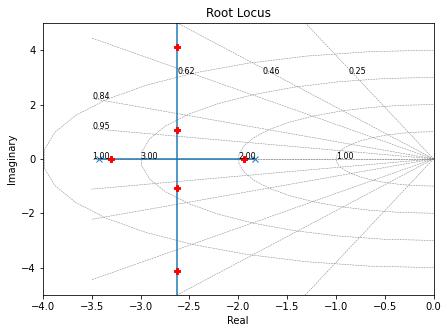

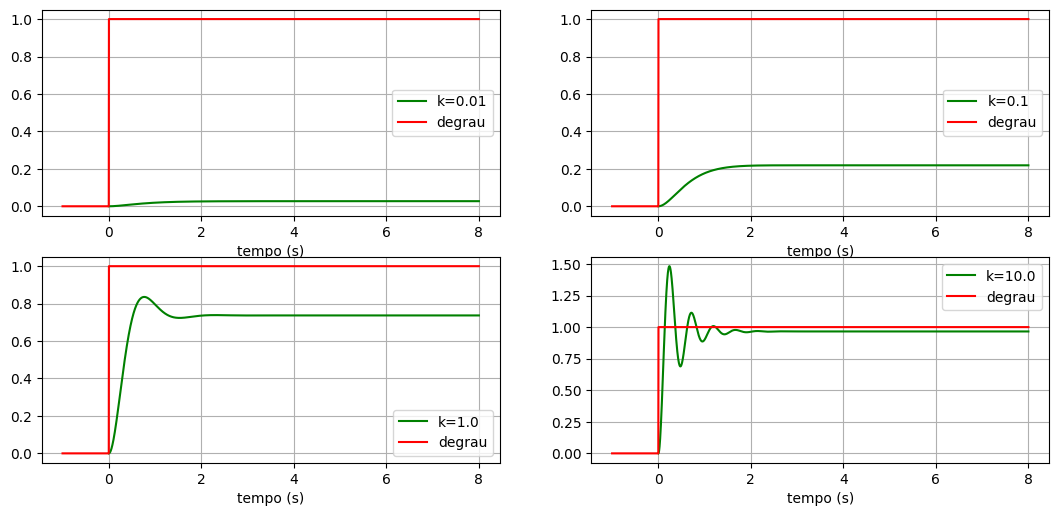

In [ ]:
#cria a função de transferência em malha aberta para simulação
s = co.tf('s') #define variavel s
G_s = (17.5) / (s**2 + 5.25*s + 6.25) #função de transferência
#print(G_s)

#LGR
plt.figure(num = 1, figsize=(7, 5))
#G1 = co.feedback(G_s, 1)
co.root_locus(G_s)
plt.xlim([-4, 0])
plt.ylim([-5, 5])
#calculando maior K para estabilidade
margens_estabilidade = co.stability_margins(G_s) #calcula as margens de estabilidade para diversas variáveis

maior_ganho_estabilidade = margens_estabilidade[0] #margem de estabilidade do ganho
print('Limite do Ganho K para estabilidade = ', maior_ganho_estabilidade,'\n') #mostra

#iniciando calculo da resposta ao degrau
tempo = 8 #tempo de simulacao
val_t = np.linspace(-1, tempo, int(5e3))

#criando um vetor degrau unitário para o plot
degrau = np.ones_like(val_t)
degrau[val_t < 0] = 0

#calculando a resposta para alguns valores de k
val_k = np.array([.01, .1, 1, 10])
plt.figure(num = 2, figsize=(13,6), dpi = 100)
for val in range(0, len(val_k)):
  C_s = val_k[val]
  G1_s = co.feedback(co.series(C_s, G_s), 1, -1) #cria um sistema temporario para a simulacao
  plt.figure(1)
  plt.plot(np.real(co.pole(G1_s)), np.imag(co.pole(G1_s)), 'rP')
  t_sim, y_sim = co.step_response(G1_s, val_t[val_t > 0])
  plt.figure(2)
  plt.subplot(2, 2, val + 1)
  plt.plot(t_sim, y_sim, 'g-')
  plt.plot(val_t, degrau, 'r-')
  plt.xlabel('tempo (s)')
  plt.legend(['k=' + str(round(val_k[val], 2)), 'degrau'])
  plt.grid(1)

#Item b)

Valor de K para *Overshoot* máximo permitido de 10% e tempo de estabelecimento, no critério de 2%, de 2 segundos.

In [ ]:
def quais_polos(mp, ts2):
  k = np.log(mp)*np.log(mp)
  csi = np.sqrt(k/(np.pi**2 + k))
  ovs = np.exp(-csi*np.pi/np.sqrt(1 - csi**2))
  wn = ts2/csi
  p1 = complex(-csi*wn, - wn*np.sqrt(1 - csi**2))
  p2 = complex(-csi*wn, wn*np.sqrt(1 - csi**2)) 
  print('wn = ', wn, 'rad/s')
  print('overshoot = ', ovs*100, '%')
  print('polos: p1 = ',p1, ' p2 = ', p2)
  return csi, p1, p2

overshoot, p1, p2 = quais_polos(.1, 2) #ovs = 10% = .1 e ts2 = 2 seg


wn =  3.38320725639016 rad/s
overshoot =  10.000000000000005 %
polos: p1 =  (-2-2.7287527076836833j)  p2 =  (-2+2.7287527076836833j)


In [ ]:
#cria a função de transferência em malha aberta para simulação
s = co.tf('s') #define variavel s
G0 = (17.5) / (s**2 + 5.25*s + 6.25) #função de transferência
G0_s = co.feedback(co.series(G0, 1), 1)
wn, csi, polos = co.damp(G0_s, doprint=False)
print('wn = ', wn[0])
print('csi = ', csi[0]) 
print('polos = ', polos)


wn =  4.873397172404482
csi =  0.538638634844706
polos =  [-2.625+4.10601693j -2.625-4.10601693j]


#Item c)
Projeto de compensadores utilizando a técnica de atraso de fase.

#Resposta ao degrau sem compensação

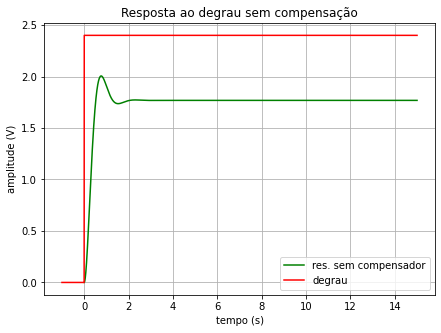

In [ ]:
tempo = 15 #tempo de simulacao
val_t = np.linspace(-1, tempo, int(5e3))

#criando um vetor degrau para o plot
degrau = 2.4 * np.ones_like(val_t)
degrau[val_t < 0] = 0

######## simulação ##################
x_sim, r0_sim = co.step_response(G0_s, val_t[val_t > 0])
for i in range(len(r0_sim)):
  r0_sim[i] *= 2.4
plt.figure(num = 3, figsize = (7, 5))
plt.figure(3)
plt.plot(x_sim, r0_sim, 'g-')
plt.plot(val_t, degrau, 'r-')
plt.xlabel('tempo (s)')
plt.ylabel('amplitude (V)')
plt.title('Resposta ao degrau sem compensação')
plt.legend(['res. sem compensador', 'degrau'])
plt.grid(1)

#Deslocando o LGR para a direita

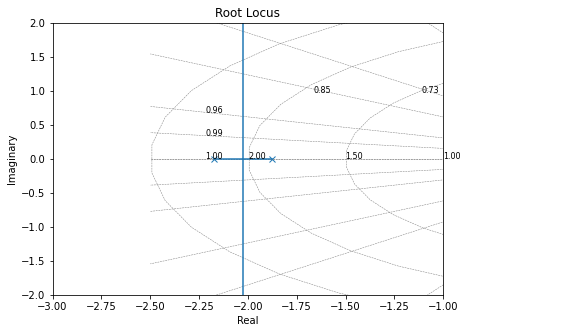

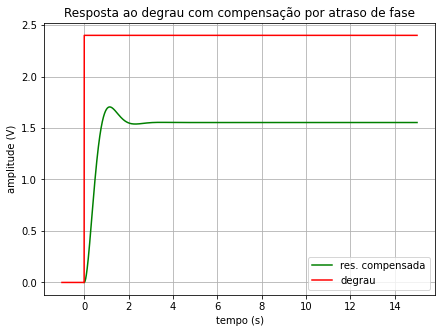

In [ ]:
#função de transferência resultante
G1 = (17.5 * .4276)/((s + 2.175)*(s + 1.875))
plt.figure(figsize = (7, 5))
r, k = co.root_locus(G1)
plt.xlim(-3, -1)
plt.ylim(-2, 2)

tempo = 15 #tempo de simulacao
val_t = np.linspace(-1, tempo, int(5e3))

#criando um vetor degrau para o plot
degrau = 2.4 * np.ones_like(val_t)
degrau[val_t < 0] = 0

G1_s = co.feedback(G1, 1)
x_sim, r1_sim = co.step_response(G1_s, val_t[val_t > 0])
for i in range(len(r1_sim)):
  r1_sim[i] *= 2.4
plt.figure(num = 4, figsize = (7, 5))
plt.figure(4)
plt.plot(x_sim, r1_sim, 'g-')
plt.plot(val_t, degrau, 'r-')
plt.xlabel('tempo (s)')
plt.ylabel('amplitude (V)')
plt.title('Resposta ao degrau com compensação por atraso de fase')
plt.legend(['res. compensada', 'degrau'])
plt.grid(1)



#Compensador por atraso de fase

compensador: polo = 0.003 zero =  0.7681411198717093
p_eixor = -1.6174294400641454
p_eixoz = -2.207672290827695
num =  (-1.6174294400641454-2.207672290827695j)
ganho kc =  0.7820040485900754 




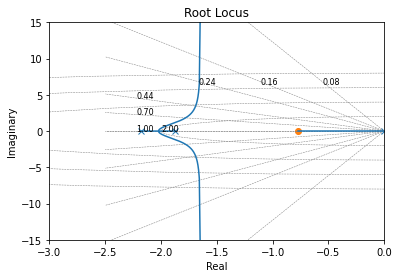

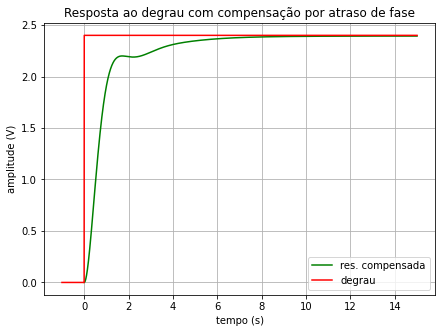

In [ ]:
################encontrando os pólos e zeros do compensador ###############################

erro = 0.005 #erro em regime permanente
amp = 2.4 #amplitude do degrau
kv = 1.87075 #lim G(s), s -> 0, (Kv)
polo = 3e-3 #polo escolhido

zero = polo * (amp - erro) / (erro * kv) #calculo do zero
print('compensador: polo =', polo, 'zero = ', zero)
n = 3 #n° polos
m = 1 #n° zeros
somapolos = 4 + polo
somazeros = zero
ovs = .591 #overshoot
p_eixor = (-somapolos + somazeros)/(n - m)
print('p_eixor =', p_eixor)
p_eixoz = p_eixor * np.tan(np.arccos(ovs))
print('p_eixoz =', p_eixoz)
num = complex(p_eixor, p_eixoz)
print('num = ', num)
ganhoKc = np.abs((7.483 * (num + zero))/((num + 2.175) * (num + 1.875) * (num + polo)))
ganhoKc = 1/ganhoKc
print('ganho kc = ', ganhoKc, '\n\n')

############# simulação ###############

tempo = 15 #tempo de simulacao
val_t = np.linspace(-1, tempo, int(5e3))

#criando um vetor degrau unitário para o plot
degrau = 2.4 * np.ones_like(val_t)
degrau[val_t < 0] = 0

#função obtida
G2 = 7.483  * ganhoKc * (s + zero)/((s + 2.175)*(s + 1.875) * (s + polo))
G2_s = co.feedback(G2, 1)
plt.figure(num = 60)
r, k = co.root_locus(G2)
plt.xlim(-3, 0)
plt.ylim(-15, 15)
x_sim, r2_sim = co.step_response(G2_s, val_t[val_t > 0])
for i in range(len(r2_sim)):
  r2_sim[i] *= 2.4
plt.figure(num = 5, figsize = (7, 5))
plt.figure(5)
plt.plot(x_sim, r2_sim, 'g-')
plt.plot(val_t, degrau, 'r-')
plt.xlabel('tempo (s)')
plt.ylabel('amplitude (V)')
plt.title('Resposta ao degrau com compensação por atraso de fase')
plt.legend(['res. compensada', 'degrau'])
plt.grid(1)


#Comparando as três respostas

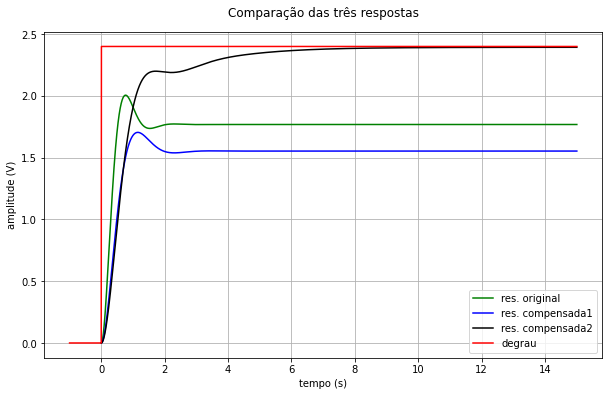

In [ ]:
plt.figure(num = 5, figsize = (10, 6))
plt.figure(5)
plt.plot(x_sim, r0_sim, 'g-')
plt.plot(x_sim,r1_sim, 'b-')
plt.plot(x_sim, r2_sim, 'k-')
plt.plot(val_t, degrau, 'r-')
plt.xlabel('tempo (s)')
plt.ylabel('amplitude (V)')
plt.title('Comparação das três respostas', pad = 15)
plt.legend(['res. original', 'res. compensada1', 'res. compensada2', 'degrau'])
plt.grid(1)